# Telemetry analysis example

In [1]:
%matplotlib widget

In [2]:
from astrobot.telemetry_analysis import *

WARNING can not find observation data file ObsDB_2021A.ecsv
<telemetry_analysis.findParameters> found directory for parameters: /Users/donaldgavel/parameterFiles


Ignore any warnings about observation data files, which is just a way to optionally provide log sheet info in csv format. Also ignore anything about parameterFiles, which are not needed.

## Reading datasets

Datasets are stored in the Lick archives by date and data set number. A typical telemetry dataset contains Hartmann slopes for about 4 seconds duration on a bright star. The date can be "today" for online monitoring. For this example case we use datasets 411 and 412 which are sample files that are provided with the git distribution.

In [3]:
ds = Set('2015-09-03',[411,412])

<finder.findVol>looking for 2015-09-03 telemetry data...
found in /Users/donaldgavel/astrobot_Keck/astrobot/src/astrobot/data
reading [411, 412]: 411..412..done


In [4]:
ds.pp # pretty-print the dataset object

2015-09-03 [411, 412]
    <class 'astrobot.telemetry_analysis.Set'>
------------------------------------------------------------
data:    <class 'dict'>
date:    datetime.date(2015, 9, 3)
db:    <class 'pandas.core.frame.DataFrame'> (2, 17)
dsfiles:    ['Data_0411.fits', 'Data_0412.fits']
dsn:    [411, 412]
fileDir:    <class 'str'>
fileDirdb:    <class 'pandas.core.frame.DataFrame'> (2, 18)
lam:    <Quantity 700. nm> 'central wavelength of the wavefront sensor light'
name:    '2015-09-03 [411, 412]'
paramDir:    '/Users/donaldgavel/parameterFiles'


## Estimating the seeing conditions

The temporal power spectrum of Kolmogorov frozen-flow turbulence is usually given as
$$S(f) = (\lambda/2\pi)^2 0.077 (v/r_0)^{5/3} f^{-8/3}$$
We use a somewhat more complicated model to account for roll-offs due to aperture size or outer scale at low frequencies and measuremennt noise floor at high frequencies.
$$S(f) = (\lambda/2\pi)^2 0.077 (v/r_0)^{p-1} (f^2 + f_0^{2(p-q)/p}f^{2q/p})^{-p/2} + S_n$$
with unknown parameters $r_0$, $v$, $p$, $q$, and $S_n$. Note that $p$ is the slope of the mid-frequency (Kolmogorov) section, $q$ is the slope of the low-frequency section, and $f_0$ is the transition frequency between the two. Usually, $p$ is close to $8/3\approx 2.67$ and $q\approx 1$.

In [5]:
ds.fit()

<class 'astrobot.telemetry_analysis.Set'> 2015-09-03 [411, 412]

## Plots
The dataset can include both open and closed loop data for comparison. Only open loop data is fit to a seeing model.

<class 'astrobot.telemetry_analysis.Set'> 2015-09-03 [411, 412]

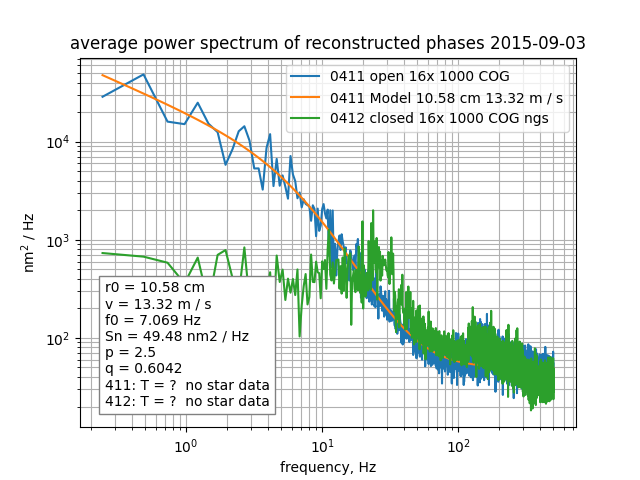

In [6]:
ds.plot()

We can plot only the open loop data (#411) to more clearly see the model fit:

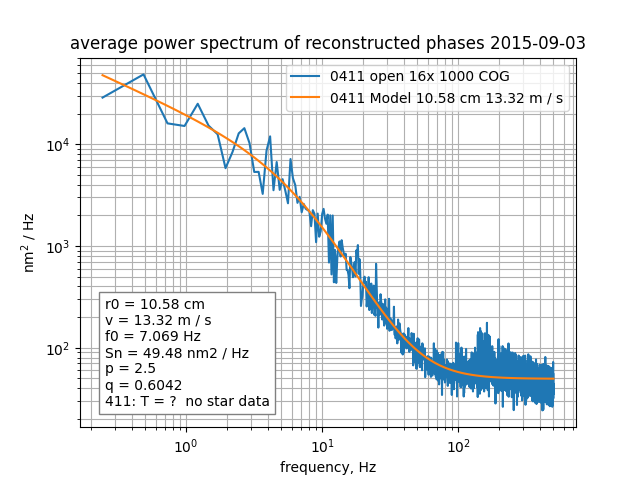

In [7]:
ds[411].plot()

## Output summary

The results can be output as a dictionary, FITS cards, commands to a data logger, etc:

In [8]:
print(ds[411].model.summary())

r0 = 10.58 cm
v = 13.32 m / s
f0 = 7.069 Hz
Sn = 49.48 nm2 / Hz
p = 2.5
q = 0.6042


In [9]:
ds[411].summary(form='fits')

[('TELMFILE', 'Data_0411.fits', 'AO telemetry data file'),
 ('TELMTIME', '2015-09-04T11:27:21', 'UTC AO telemetry data time'),
 ('AO_R0', 10.58, 'cm A0 telemetry r0'),
 ('AO_V', 13.32, 'm / s A0 telemetry wind speed'),
 ('A0_F0', 7.07, 'Hz A0 telemetry low freq break'),
 ('AO_SN', 49.48, 'nm2 / Hz A0 telemetry noise floor'),
 ('AO_P', 2.5, ' A0 telemetry mid freq power law f^-p'),
 ('AO_Q', 0.6, ' A0 telemetry low freq power law f^-q')]

In [10]:
ds[411].summary(form='dict')

    r0 = 10.58236952828104 cm
    v = 13.316655394700026 m / s
    f0 = 7.068579369082383 Hz
    Sn = 49.48390963463881 nm2 / Hz
    p = 2.5
    q = 0.6042006310090722

In [11]:
dict(_)

{'r0': <Quantity 10.58 cm>,
 'v': <Quantity 13.32 m / s>,
 'f0': <Quantity 7.07 Hz>,
 'Sn': <Quantity 49.48 nm2 / Hz>,
 'p': <Quantity 2.5>,
 'q': <Quantity 0.6>}